In [32]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math


In [33]:
# -*- coding: utf-8 -*-
#dtype = torch.float
#device = torch.device("cpu")
#device = torch.device("cuda")
# Create random input and output data
start = time.time()
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

end = time.time()
print(f'time: {end-start}')
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')


99 99.77107139758851
199 70.50805484576148
299 50.70730676796995
399 37.29334650930818
499 28.196409699114465
599 22.02045424589268
699 17.82295025318427
799 14.966923427546147
899 13.021460981988621
999 11.694748017366166
1099 10.788957648226429
1199 10.169834617997747
1299 9.746166731964845
1399 9.455916147740638
1499 9.25684050325334
1599 9.12014381275249
1699 9.026173866800399
1799 8.961503361578977
1899 8.916947587464977
1999 8.886216680279464
time: 0.335573673248291
Result: y = 0.007242781510559869 + 0.86132416396666 x + -0.0012495003309761319 x^2 + -0.09398232652570092 x^3


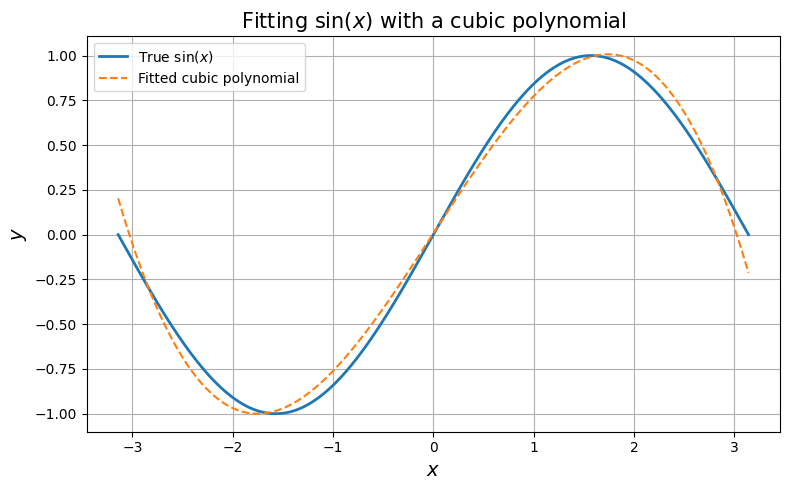

In [34]:
import matplotlib.pyplot as plt

# Compute the fitted curve using the final values of a, b, c, d
y_fit = a + b * x + c * x**2 + d * x**3

# Plot the true function and the fitted polynomial
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='True $\\sin(x)$', linewidth=2)
plt.plot(x, y_fit, label='Fitted cubic polynomial', linestyle='--')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.title('Fitting $\\sin(x)$ with a cubic polynomial', fontsize=15)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# -*- coding: utf-8 -*-

import torch
import math

dtype = torch.float
#device = torch.device("cpu")
device = torch.device("cuda:0") # Uncomment this to run on GPU
start = time.time()

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

end = time.time()
print(f'time: {end-start}')
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

AssertionError: Torch not compiled with CUDA enabled

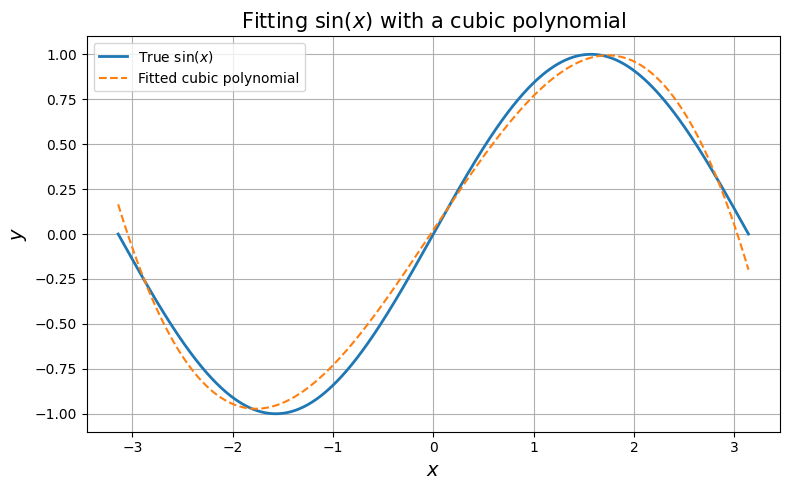

In [ ]:
import matplotlib.pyplot as plt

# Compute the fitted curve using the final values of a, b, c, d
y_fit = a + b * x + c * x**2 + d * x**3

# Plot the true function and the fitted polynomial
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='True $\\sin(x)$', linewidth=2)
plt.plot(x, y_fit, label='Fitted cubic polynomial', linestyle='--')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.title('Fitting $\\sin(x)$ with a cubic polynomial', fontsize=15)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
